In [36]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import time
import datetime as dt
import glob
import seaborn as sns

In [2]:
def all_csv_df():
    '''
    Loops through the .csv in /raw and concatonates them into 1 Dataframe
    '''
    path = r'/Users/AaronLee/Documents/GalvanizeDSI/UnsplashEDA/raw'
    all_files = glob.glob(path + "/*.csv")

    list_holder = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_holder.append(df)

    US_df = pd.concat(list_holder, axis=0, ignore_index=True)
    return US_df

In [ ]:
def test(t, n):
    data = []
    for i in range(t):
        data.append(range(n))
        if i == (t-1):
            print('pass')
        else:
            time.sleep(2)
    return data

In [ ]:
test(5, 10)

In [ ]:
full_df = all_csv_df()

In [ ]:
columns = []
for col in full_df.columns: 
    columns.append(col)
print (columns)

In [ ]:
full_df[['exif.make','downloads','user.total_collections', 'user.total_likes', 'user.total_photos']]

In [ ]:
t = 10
n = 50

for i in range(t):
    print ('Hour {} has passed {} has been appended'.format(i+1, (i+1)*n))

In [4]:
full_df = all_csv_df()
Unsplash_df = full_df.drop_duplicates('id')
Unsplash_df = Unsplash_df[['id', 'user.username', 'created_at', 'views', 'likes', 'downloads', 'exif.make', 'exif.aperture', 'location.country', 'user.total_photos', 'user.total_collections', 'user.instagram_username', 'user.twitter_username', 'color']]
Unsplash_df['dl_percent'] = (Unsplash_df['downloads'] / Unsplash_df['views']) * 100
Unsplash_df['like_percent'] = (Unsplash_df['likes'] / Unsplash_df['views']) * 100
# Unsplash_df.head()

In [46]:
a = Unsplash_df[Unsplash_df['dl_percent'] >  0.6917562385755861]
b = Unsplash_df[Unsplash_df['dl_percent'] <  0.056323473476202715]
dl99 = pd.concat([a,b])
dl99 = dl99[['id', 'views', 'downloads', 'dl_percent', 'color']]

In [47]:
dl99

,id,views,downloads,dl_percent,color
33,u8qNkP5eQvo,42240,430,1.017992,#F49521
429,Q9GBNYnAiHM,209364,2457,1.173554,#FEE371
505,5jSjCXkPchc,107989,796,0.737112,#1E1E23
563,VRChrIJ7NrU,43134,364,0.843882,#172019
622,MHZjW_qGMfU,59517,616,1.034998,#191710
660,-BtZARgyCKI,111294,805,0.723309,#171E32
710,IYtp7I_yfIY,87768,658,0.749704,#E2E2DF
1000,ZP2mBcPGUKI,60547,482,0.796076,#081418
1151,8qXnX2T_3mo,45981,359,0.780757,#FDF7E4
1226,uJiT_OnlJ0I,29456,431,1.463199,#F0F2F1


In [48]:
dl99.sort_values('dl_percent')
# print ('High percent: {}'.format(a['views'].mean()))
# print ('Low Percent: {}'.format(b['views'].mean()))

,id,views,downloads,dl_percent,color
89,HCZEuKCuOz8,13542801,2570,0.018977,#FCF8F4
1778,z8d8qjO9IFw,8407729,1978,0.023526,#F3E3D3
171,QIbkn3YuUEQ,2850633,747,0.026205,#EFF1F2
591,QyNM4jOFiqg,8058513,2164,0.026854,#11110D
1636,pQUhDNC4hl0,6741178,1936,0.028719,#E4E5E4
2969,OXkoApRMU5E,8703410,2609,0.029977,#0D1417
1651,QBhkgJoSBNE,3578166,1105,0.030882,#030305
271,q_SMKL1pvYg,2944049,940,0.031929,#D7DEE2
1337,eN76naVNUCo,5349439,1989,0.037181,#BDE0F0
2176,y-njhJIffIo,6925293,2683,0.038742,#040F0E


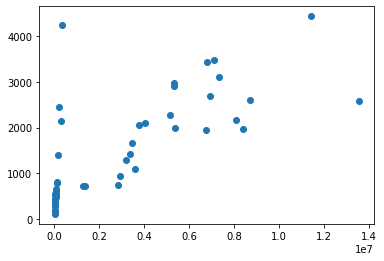

In [34]:
plt.scatter(dl99['views'], dl99['downloads']);

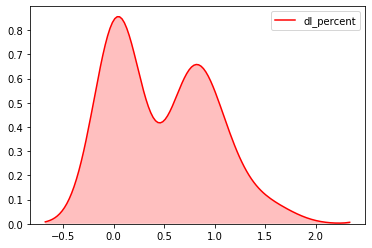

In [37]:
p1=sns.kdeplot(dl99['dl_percent'], shade=True, color="r")

In [ ]:
pd.plotting.scatter_matrix(dl99[['views', 'downloads', 'dl_percent']].applymap(lambda x:x*1), figsize=(12,12), diagonal='kde');

In [ ]:
dl999 = Unsplash_df[Unsplash_df['views'] <  25563.56]

In [ ]:
dl999

In [ ]:
dl999.count()

In [49]:
print ('This is the 99% of dl_percent: {}'.format(np.percentile(Unsplash_df['dl_percent'], 99)))
print ('This is the 1% of dl_percent: {}'.format(np.percentile(Unsplash_df['dl_percent'], 1)))
# This helps us to determine the cut-off

This is the 99% of dl_percent: 0.6917562385755861
This is the 1% of dl_percent: 0.056323473476202715
